In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load the file

In [33]:
file = '../20210307_valuation_result.csv'
df = pd.read_csv(file)

In [34]:
df.head(5)

,ticker,current_price,estimated_value,price_to_value
0,PNR,55.93,31.991080,1.748300
1,ALLE,108.78,61.920778,1.756761
2,ITW,202.18,174.335804,1.159716
3,AMAT,118.19,181.176166,0.652348
4,NWL,23.17,12.197360,1.899591


In [35]:
df.describe()

,current_price,estimated_value,price_to_value
count,493.000000,491.000000,491.000000
mean,173.703550,-732.493027,1.072590
std,320.944599,18773.383643,11.060162
min,10.940000,-415565.434465,-131.558105
25%,54.370000,13.657295,0.573640
50%,101.170000,62.284932,1.244573
75%,181.050000,119.938801,2.135386
max,4500.840000,10030.037157,99.836823


## EDA

array([[<AxesSubplot:title={'center':'price_to_value'}>]], dtype=object)

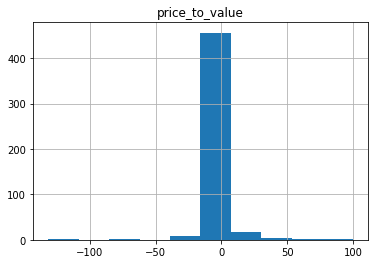

In [36]:
df.hist(column="price_to_value")

### calculate the range

In [37]:
def cut_to(x):
    if x<0:
        return 'less than 0'
    elif x<1:
        return '0-1'
    else:
        return 'larger than 1'

df['valuation_range'] = df['price_to_value'].map(cut_to)

In [38]:
df

,ticker,current_price,estimated_value,price_to_value,valuation_range
0,PNR,55.93,31.991080,1.748300,larger than 1
1,ALLE,108.78,61.920778,1.756761,larger than 1
2,ITW,202.18,174.335804,1.159716,larger than 1
3,AMAT,118.19,181.176166,0.652348,0-1
4,NWL,23.17,12.197360,1.899591,larger than 1
...,...,...,...,...,...
500,UAL,52.68,-1436.188166,-0.036680,less than 0
501,CDW,156.89,94.583927,1.658738,larger than 1
502,MU,91.53,139.743501,0.654986,0-1
503,DLTR,98.20,96.001908,1.022896,larger than 1


In [39]:
df['valuation_range'].value_counts()

larger than 1    308
0-1              111
less than 0       86
Name: valuation_range, dtype: int64

## sort

In [40]:
df.sort_values(by=['price_to_value'])

,ticker,current_price,estimated_value,price_to_value,valuation_range
306,AIG,43.95,-0.334073,-131.558105,less than 0
5,MAA,134.73,-1.918984,-70.209023,less than 0
47,EQIX,648.34,-9.297597,-69.731995,less than 0
385,CCI,155.75,-4.615512,-33.744900,less than 0
235,QRVO,174.73,-6.287506,-27.790032,less than 0
...,...,...,...,...,...
281,GLW,NaN,NaN,NaN,larger than 1
287,KEY,NaN,NaN,NaN,larger than 1
296,PCAR,NaN,NaN,NaN,larger than 1
342,BSX,38.78,NaN,NaN,larger than 1


### select the valuation between 0-1

In [41]:
df = df.loc[df['valuation_range'] == '0-1']
df = df.sort_values(by=['price_to_value'])

array([[<AxesSubplot:title={'center':'price_to_value'}>]], dtype=object)

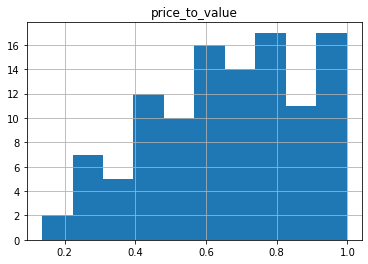

In [42]:
df.hist(column="price_to_value")

In [43]:
df.head(10)

,ticker,current_price,estimated_value,price_to_value,valuation_range
138,HLT,123.68,909.314907,0.136014,0-1
130,BEN,26.17,165.886602,0.157758,0-1
58,BKNG,2328.51,9756.016223,0.238674,0-1
283,SYF,38.68,155.075903,0.249426,0-1
460,REGN,450.57,1748.773261,0.257649,0-1
91,BWA,45.00,171.283632,0.262722,0-1
72,FOX,31.93,116.005478,0.275246,0-1
188,DISCA,53.03,188.477954,0.281359,0-1
53,PHM,45.11,156.606119,0.288047,0-1
362,DHI,76.87,247.517863,0.310563,0-1


In [46]:
df.loc[(df['price_to_value']>0.6) & (df['price_to_value']<0.8)]

,ticker,current_price,estimated_value,price_to_value,valuation_range
194,LEN,82.97,137.275033,0.604407,0-1
470,IVZ,22.42,37.064049,0.604899,0-1
251,MCK,169.52,277.683546,0.610479,0-1
427,SIVB,505.36,823.280866,0.613837,0-1
9,BAC,34.71,55.488969,0.625530,0-1
148,PEG,53.83,85.705031,0.628084,0-1
313,DG,188.99,295.474998,0.639614,0-1
77,RJF,116.74,182.099416,0.641078,0-1
219,PGR,85.95,131.760217,0.652321,0-1
3,AMAT,118.19,181.176166,0.652348,0-1
